In [4]:
import json

package_dependency_file = "input/all-by-package.cmr"
with open(package_dependency_file, 'r') as file:
    package_dependency_data = json.load(file)

package_id_file = "input/idmap.json"
with open(package_id_file, 'r') as file:
    package_id_data = json.load(file)

In [5]:
package_dependency_graph_data = package_dependency_data['graph']
print("Keys in the graph:", package_dependency_graph_data.keys())

Keys in the graph: dict_keys(['vList', 'eList', 'lMap', 'clusterMap'])


In [6]:
print("Keys in the id:", package_id_data['keys'].keys())

# Get key from value
def get_key(val): 
    for key, value in package_id_data['keys'].items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

# Get the package name from the package id
def get_package_name(package_id):
    package_name_with_prefix = get_key(package_id)
    package_name = package_name_with_prefix.split('L')[1]
    return package_name

print("Package name for k:", get_package_name('k'))

Keys in the id: dict_keys(['Pex-Pjava.lang', 'Ljava.net.http.HttpRequest', 'Pcom.iluwatar.aggregator.microservices', 'Pex-Pjava.net.http', 'Ljava.lang.Object', 'float', 'MLcom.iluwatar.aggregator.microservices.AggregatorgetProduct(', 'Lcom.iluwatar.aggregator.microservices.Product', 'Ljava.net.http.HttpRequest.Builder', 'Lcom.iluwatar.aggregator.microservices.ProductInventoryClientImpl', 'MLcom.iluwatar.aggregator.microservices.ProductInformationClientImplgetProductTitle(', 'Pex-__defaultpackage$1', 'MLjava.lang.IntegerparseInt(java.lang.String)V', 'MLorg.slf4j.Loggererror(java.lang.String)Vjava.lang.Throwable)V', 'Ljava.lang.Throwable', 'MLcom.iluwatar.inventory.microservice.InventoryControllergetProductInventories(', 'MLjava.net.http.HttpClientnewHttpClient(', 'Ljava.lang.String', 'Ljava.lang.Thread', 'Fcom.iluwatar.aggregator.microservices.AggregatorinformationClient', 'Pex-Pjava.net', 'MLcom.iluwatar.aggregator.microservices.ProductInventoryClientImplgetProductInventories(', 'void'

In [7]:
nodes = []
for vertex in package_dependency_graph_data['vList']:
    package_id = vertex['type']
    package_name = get_package_name(package_id)
    print("Package name:", package_name)
    nodes.append(package_name)

Package name: com.iluwatar.aggregator.microservices.Aggregator
Package name: com.iluwatar.aggregator.microservices.ProductInventoryClientImpl
Package name: com.iluwatar.aggregator.microservices.ProductInventoryClient
Package name: com.iluwatar.aggregator.microservices.ProductInformationClient
Package name: com.iluwatar.aggregator.microservices.Product
Package name: com.iluwatar.aggregator.microservices.ProductInformationClientImpl


In [8]:
for edges in package_dependency_graph_data['eList']:
    for edge in edges['L']:
        source_package_id = edge['s']
        source_package_name = get_package_name(source_package_id)
        destination_package_id = edge['d']
        destination_package_name = get_package_name(destination_package_id)
        weight = edge['w']
        print(f"Edge: {source_package_name} -> {destination_package_name}, weight: {weight}")

Edge: com.iluwatar.aggregator.microservices.Aggregator -> com.iluwatar.aggregator.microservices.Product, weight: 1
Edge: com.iluwatar.aggregator.microservices.Aggregator -> com.iluwatar.aggregator.microservices.Product, weight: 5
Edge: com.iluwatar.aggregator.microservices.ProductInventoryClientImpl -> com.iluwatar.aggregator.microservices.ProductInventoryClient, weight: 1
Edge: com.iluwatar.aggregator.microservices.Aggregator -> com.iluwatar.aggregator.microservices.ProductInformationClient, weight: 1
Edge: com.iluwatar.aggregator.microservices.Aggregator -> com.iluwatar.aggregator.microservices.ProductInformationClient, weight: 1
Edge: com.iluwatar.aggregator.microservices.Aggregator -> com.iluwatar.aggregator.microservices.ProductInventoryClient, weight: 1
Edge: com.iluwatar.aggregator.microservices.Aggregator -> com.iluwatar.aggregator.microservices.ProductInventoryClient, weight: 1
Edge: com.iluwatar.aggregator.microservices.ProductInformationClientImpl -> com.iluwatar.aggregator.

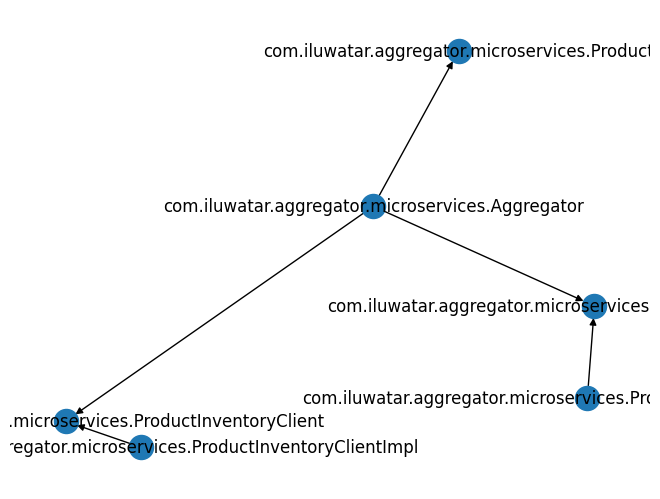

In [9]:
# Generate the graph data
import networkx as nx

G = nx.DiGraph()

for vertex in package_dependency_graph_data['vList']:
    package_id = vertex['type']
    package_name = get_package_name(package_id)
    G.add_node(package_name)

for edges in package_dependency_graph_data['eList']:
    for edge in edges['L']:
        source_package_id = edge['s']
        source_package_name = get_package_name(source_package_id)
        destination_package_id = edge['d']
        destination_package_name = get_package_name(destination_package_id)
        weight = edge['w']
        G.add_edge(source_package_name, destination_package_name, weight=weight)

# Print the graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
# Save the graph data to a file
import pickle

with open('output/graph_data.pickle', 'wb') as file:
    pickle.dump(G, file)